In [1]:
import matplotlib.pyplot as plt

import numpy as np
import torch
from interpretability.comparison.fixedpoints import find_fixed_points
import os
from interpretability.comparison.analysis.tt.tt import Analysis_TT
# Import pca
from sklearn.decomposition import PCA
import glob
import cv2
import shutil
import imageio
import matplotlib.colors as mcolors

/home/csverst/miniconda3/envs/build5/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
suffix = "NBFF_GRU"
filepath1 = (
"/home/csverst/Github/InterpretabilityBenchmark/"
"trained_models/task-trained/20240129_NBFF_GRU_Noise_2/"
)
plot_path = (
    "/home/csverst/Github/InterpretabilityBenchmark/"
    f"interpretability/comparison/plots/{suffix}/"
)
os.makedirs(plot_path, exist_ok=True)

comp = Analysis_TT(run_name=suffix, filepath=filepath1)


2024-01-29 14:57:38,931	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-29 14:57:39,573	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [11]:
fps = comp.compute_FPs(learning_rate=5e-3,
                       max_iters =  20000)


Iteration 500/10000
q = 1.12E-02 +/- 3.82E-02
dq = 4.18E-05 +/- 1.35E-04

Iteration 1000/10000
q = 3.05E-03 +/- 1.12E-02
dq = 5.73E-06 +/- 2.24E-05

Iteration 1500/10000
q = 1.40E-03 +/- 4.86E-03
dq = 1.82E-06 +/- 7.43E-06

Iteration 2000/10000
q = 7.99E-04 +/- 2.56E-03
dq = 7.94E-07 +/- 3.05E-06

Iteration 2500/10000
q = 5.11E-04 +/- 1.54E-03
dq = 4.12E-07 +/- 1.48E-06

Iteration 3000/10000
q = 3.53E-04 +/- 1.02E-03
dq = 2.39E-07 +/- 7.89E-07

Iteration 3500/10000
q = 2.57E-04 +/- 7.24E-04
dq = 1.54E-07 +/- 4.88E-07

Iteration 4000/10000
q = 1.93E-04 +/- 5.28E-04
dq = 1.07E-07 +/- 3.37E-07

Iteration 4500/10000
q = 1.47E-04 +/- 3.87E-04
dq = 7.87E-08 +/- 2.52E-07

Iteration 5000/10000
q = 1.13E-04 +/- 2.83E-04
dq = 5.85E-08 +/- 1.81E-07

Iteration 5500/10000
q = 8.74E-05 +/- 2.13E-04
dq = 4.37E-08 +/- 1.21E-07

Iteration 6000/10000
q = 6.84E-05 +/- 1.63E-04
dq = 3.32E-08 +/- 8.82E-08

Iteration 6500/10000
q = 5.38E-05 +/- 1.27E-04
dq = 2.57E-08 +/- 6.67E-08

Iteration 7000/10000
q = 

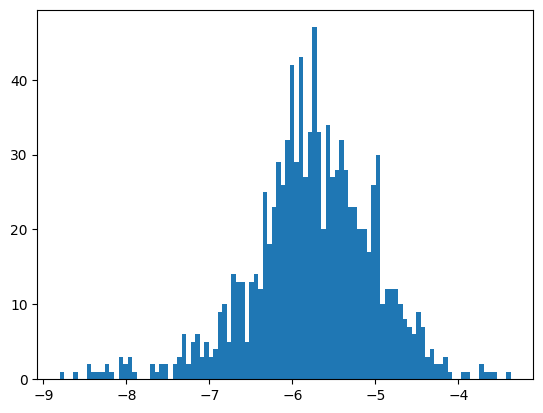

In [8]:
q_vals = fps.qstar
fig1= plt.hist(np.log10(q_vals), bins=100)


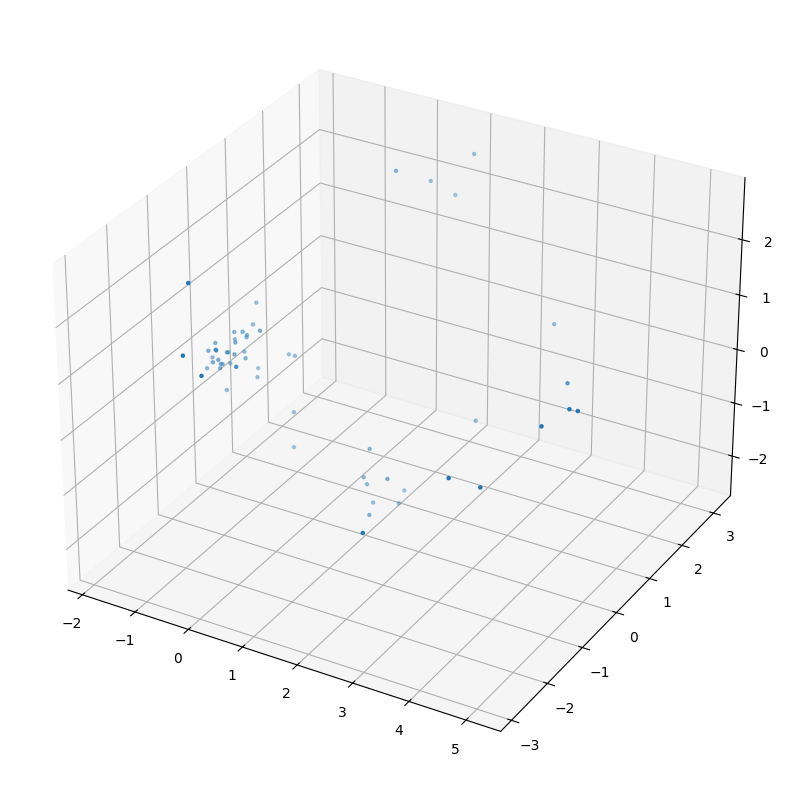

In [12]:
q_thresh = 1e-7
qFlag = q_vals < q_thresh
x_FP = fps.xstar[qFlag]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
pca = PCA(n_components=3)
pca.fit(x_FP)
x_pca = pca.transform(x_FP)
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], s=5)